In [1]:
import kagglehub


path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

print("Path to dataset files:", path)

c:\Users\ENVY\OneDrive\Desktop\projects\SuperStore_Sales\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\ENVY\.cache\kagglehub\datasets\vivek468\superstore-dataset-final\versions\1


In [2]:
import os
import pandas as pd
print(os.listdir(path))

csv_path = os.path.join(path, "Sample - Superstore.csv")
df = pd.read_csv(csv_path, encoding='latin1')
df.head()

['Sample - Superstore.csv']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
from sklearn.preprocessing import LabelEncoder
# Drop unnecessary columns
df = df.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name'], axis=1)

# Encode categorical features
le = LabelEncoder()
for col in ['Category', 'Sub-Category', 'Region', 'State', 'City', 'Ship Mode', 'Segment']:
    df[col] = le.fit_transform(df[col])

df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,2,0,United States,194,15,42420,2,0,4,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,2,0,United States,194,15,42420,2,0,5,731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,2,1,United States,266,3,90036,3,1,10,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,3,0,United States,153,8,33311,2,0,16,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,3,0,United States,153,8,33311,2,1,14,22.3680,2,0.20,2.5164


In [4]:
X = df[['Discount', 'Category', 'Sub-Category', 'Region', 'State', 'City', 'Ship Mode', 'Segment']]
y_sales = df['Sales']
y_profit = df['Profit']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_sales_train, y_sales_test = train_test_split(X, y_sales, test_size=0.2, random_state=42)
X_train2, X_test2, y_profit_train, y_profit_test = train_test_split(X, y_profit, test_size=0.2, random_state=42)

model_sales = LinearRegression()
model_profit = LinearRegression()

model_sales.fit(X_train, y_sales_train)
model_profit.fit(X_train2, y_profit_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


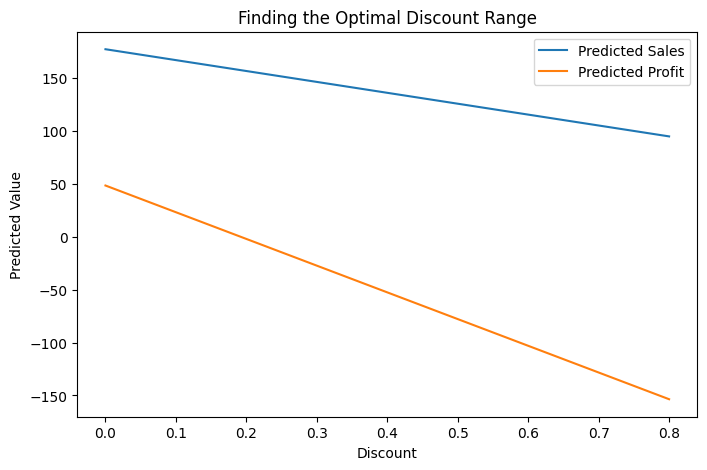

In [6]:
import numpy as np
import matplotlib.pyplot as plt

discount_range = np.linspace(0, 0.8, 50)
sample = X.iloc[0:1].copy()  # take one sample row as base

sales_preds, profit_preds = [], []

for d in discount_range:
    sample['Discount'] = d
    sales_preds.append(model_sales.predict(sample)[0])
    profit_preds.append(model_profit.predict(sample)[0])

# Plot results
plt.figure(figsize=(8,5))
plt.plot(discount_range, sales_preds, label='Predicted Sales')
plt.plot(discount_range, profit_preds, label='Predicted Profit')
plt.title("Finding the Optimal Discount Range")
plt.xlabel("Discount")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()


In [7]:
df['Discount_sq'] = df['Discount'] ** 2
df['Disc_Category'] = df['Discount'] * df['Category']


In [8]:
from sklearn.ensemble import RandomForestRegressor
model_profit = RandomForestRegressor(random_state=42)
model_sales = RandomForestRegressor(random_state=42)
model_profit.fit(X_train2, y_profit_train)
model_sales.fit(X_train, y_sales_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error
print("Sales R²:", r2_score(y_sales_test, model_sales.predict(X_test)))
print("Profit R²:", r2_score(y_profit_test, model_profit.predict(X_test)))


Sales R²: 0.04132480710277542
Profit R²: -0.10746822552454827
